In [1]:
import pandas as pd

In [2]:
# 시각화의 대표 라이브러리
from matplotlib import pyplot as plt
import matplotlib

In [3]:
# 시본: seaborn : mat~ 기반으로 더욱 확장된 형태의 시각화 도구
# 산포행렬, 시계열, 산포도, 박스플롯, 선형회귀, 변수플로팅등에 탁월

In [4]:
# 차트가 주피터에 삽입(결과창에 등장)
%matplotlib inline

In [5]:
# 한글 처리
matplotlib.rc( 'font', family='Malgun Gothic' )

In [6]:
import sklearn.datasets

In [7]:
# 아이리스 데이터 로드 함수
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    # 관찰결과, data(실데이터) 항목과 feature_names(컬럼)을 획득해서 DF로 생성
    #print( type(ds), ds )
    df = pd.DataFrame( ds['data'], columns=ds['feature_names'] )
    # df 자체에 데이터는 존재하나,  그 데이터가 무엇을 의미하는지가 없다
    # 본 데이터는 지도학습법에 관련된 데이터로써 형태를 맞춰주는게 중요
    #print( '데이터가 지향하는 결과 종류 => ',  ds['target_names'] )
    # ['setosa' 'versicolor' 'virginica']
    # { 0:'setosa', 1:'versicolor', ... }
    #print(  dict( zip( range(3), ds['target_names'] ) )   )
    #print(  dict( zip( ['A','B','C'], ds['target_names'] ) )   )
    
    # 관련없는 2개의 연속데이터를 키와 값을 세트로 재구성
    targer_dic = dict( zip( range(3), ds['target_names'] ) )
    tmp = [ targer_dic[n] for n in ds['target'] ]
    #print( '정답 나열 => ', tmp  )
    df['species'] = tmp
    return df

In [8]:
df = get_iris_df()
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


## 원형차트 => 파이차트

- 중요한 문서, 발표자료에 거의 사용을 않한다
- 데이터를 깔끔하게 보여주는 장점
- 원형차트의 데이터는 수치표로도 보여줄수 있다
- 사용이유. 시각화의 목적 : 같은 정보를 어떻게 표현하면 좀더 쉽게 이해시킬수 있을가?
- 비교하는 데이터의 종류가 적을 경우 유리, 

In [9]:
# 종별 변수 데이터 평균
sums_by_species = df.groupby('species').sum()
sums_by_species

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,250.3,170.9,73.2,12.2
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [10]:
# 첫번째 컬럼 데이터 획득
var_name = sums_by_species.columns[0]
var_name, sums_by_species[ var_name ]

('sepal length (cm)', species
 setosa        250.3
 versicolor    296.8
 virginica     329.4
 Name: sepal length (cm), dtype: float64)

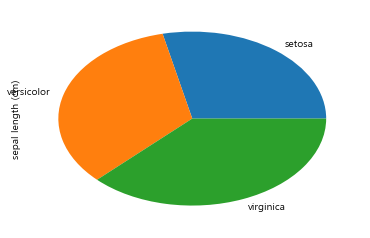

In [11]:
sums_by_species[ var_name ].plot(kind='pie', fontsize=10)  

Text(0.5,1,'sepal length (cm) 기준으로 분류한 붓꽃의 데이터 크기 비교')

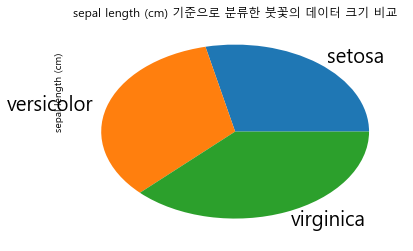

In [12]:
sums_by_species[ var_name ].plot(kind='pie', fontsize=20)  
# 데이터의 이름이 라벨을 가리니, 조정
plt.ylabel( var_name, horizontalalignment='left' )
# 제목
plt.title( '%s 기준으로 분류한 붓꽃의 데이터 크기 비교' % var_name )

In [13]:
# 데이터 확인
sums_by_species.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,250.3,170.9,73.2,12.2
versicolor,296.8,138.5,213.0,66.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CA0C263358>,
      dtype=object)

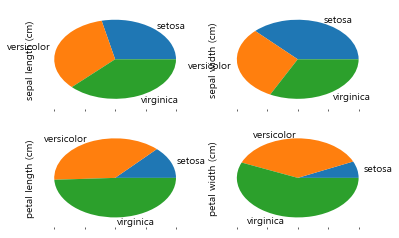

In [14]:
# 4개 구역 => layout(2,2) 나눠서 차트화
# legend : 범례
sums_by_species.plot( kind='pie', subplots=True, layout=(2,2), legend=False )

## 막대그래프 -> 바차트
- 원형차트와 목적은 동일
- 통상 막대그래프가 더 적합한 경우가 많다
- 여러 값을 상대적으로 크기 비교하기가 적합하다

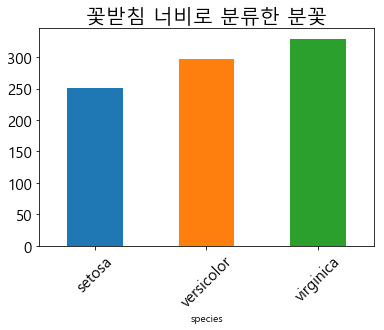

In [15]:
plt.title('꽃받침 너비로 분류한 분꽃', fontsize=20)
sums_by_species[ var_name ].plot( kind='bar', fontsize=15, rot=45 )

Text(0.5,0.98,'종별 전체 측정값 비교')

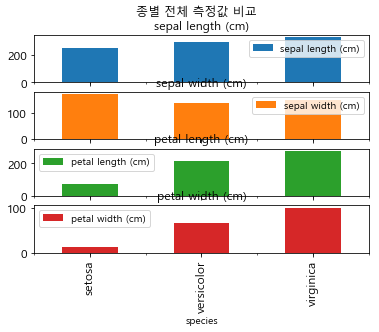

In [16]:
sums_by_species.plot( kind='bar', fontsize=12, subplots=True )
plt.suptitle('종별 전체 측정값 비교')

## 히스토그램

## 상자그림(박스플롯)

## 산포행렬

## 산포도

## 산포로그

## 히트맵

## 시계열

## 상관관계